## Exploration
- Attribute analysis:
    - Name
    - Type
    - Missing values
    - Noisiness
    - Usefulness
    - Distribution type

- Data visualization

- Correlations

- Potential transformations

In [13]:
import sys
sys.path.append("..")

In [14]:
import numpy as np
import seaborn as sns
from src.load import load_diamonds
from src.splitters import split_train_test

In [15]:
# Load train set
diamonds = load_diamonds()
diamonds_train, _ = split_train_test(diamonds)

In [16]:
# Correlation of each attribute with the price
corr_matrix = diamonds_train.corr()
corr_matrix["price"].sort_values(ascending=False)[1:]

carat    0.921739
x        0.884761
y        0.862460
z        0.855074
table    0.128356
depth   -0.010910
Name: price, dtype: float64

In [17]:
# Pairplot
#sns.pairplot(diamonds_train, height=1.5)

<img src="../images/pairplot.png" width="500">

&lt;AxesSubplot:xlabel=&#39;carat&#39;, ylabel=&#39;price&#39;&gt;

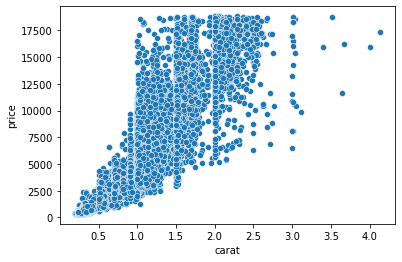

In [18]:
# Carat vs Price
sns.scatterplot(data=diamonds_train, x="carat", y="price")

In [19]:
# Try attribute combinations
diamonds_train["carat_squared"] = diamonds_train["carat"] ** 2
diamonds_train["carat_log"] = np.log(diamonds_train["carat"])
diamonds_train["x_squared"] = diamonds_train["x"] ** 2
diamonds_train["y_squared"] = diamonds_train["y"] ** 2
diamonds_train["x_times_y"] = diamonds_train["x"] * diamonds_train["y"]
diamonds_train["x_squared_times_y"] = diamonds_train["x_squared"] * diamonds_train["y"]
diamonds_train["x_times_y_squared"] = diamonds_train["x"] * diamonds_train["y_squared"]
diamonds_train["mean_xy"] = (diamonds_train["x"] + diamonds_train["y"]) / 2
diamonds_train["ae_xy"] = (diamonds_train["x"] - diamonds_train["y"]).abs()
diamonds_train["se_xy"] = (diamonds_train["x"] - diamonds_train["y"]) ** 2

In [20]:
# Correlation again
corr_matrix = diamonds_train.corr()
corr_matrix["price"].sort_values(ascending=False)[1:]

carat                0.921739
x_squared_times_y    0.913469
x_squared            0.908516
x_times_y            0.898289
carat_squared        0.894966
x                    0.884761
mean_xy              0.879791
y                    0.862460
carat_log            0.855677
z                    0.855074
x_times_y_squared    0.605957
y_squared            0.550082
table                0.128356
ae_xy                0.038181
se_xy                0.010934
depth               -0.010910
Name: price, dtype: float64

### Insights
**carat**, **x**, **y** and **z** are strongly linearly correlated to **price**.

The newly created attributes **x_squared_times_y**, **x_squared** and **x_times_y** seem promising.

It may be interesting to convert **depth** and **table** to categorical, following the next standard:

<img src="../images/table-depth.png" width="600" />